#MLP - Regression

## Import library

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

## Data preprocessing

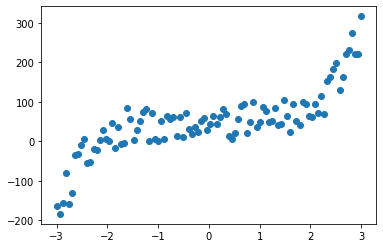

In [17]:
# Initialize 100 data points in domain [-3, 3]
# y = x^5
x = torch.unsqueeze(torch.linspace(-3, 3, 100), dim=1)
noise = 100*torch.rand(x.size()) 
y = x.pow(5) + noise
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Model architecture

###Linear regression

In [3]:
class LinearNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # inherited from torch.nn
        super(LinearNet, self).__init__()

        # initialize a identity function 
        # number of input nodes: n_feature
        # number of output nodes: n_output
        # note: self.output is a function 
        #       where input size and output size are fixed
        self.output = torch.nn.Linear(n_feature, n_output)

    def forward(self, x):
        # forward pass from input nodes to output nodes
        y = self.output(x)            
        return y

###Non-linear regression

In [18]:
class NonLinearNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        # inherited from torch.nn
        super(NonLinearNet, self).__init__()

        # initialize two identity functions 
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.output = torch.nn.Linear(n_hidden, n_output)

        # initialize a sigmoid function
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        # forward pass from input nodes to output nodes
        h = self.sigmoid(self.hidden(x))
        y = self.output(h)  
        return y

## Model training

###Train linear model


In [5]:
# initialize the network with specific size of input nodes, hidden nodes and output nodes
linear_net = LinearNet(n_feature=1, n_hidden=0, n_output=1)

# define the loss function we would like to use
loss_func = torch.nn.MSELoss()

# choose the optimizer we want to use
optimizer = torch.optim.SGD(params=linear_net.parameters(), lr=0.01)

# print net architecture
print(linear_net)  

LinearNet(
  (output): Linear(in_features=1, out_features=1, bias=True)
)


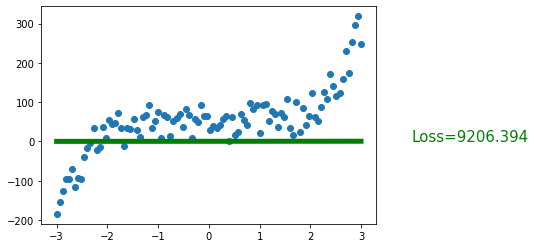

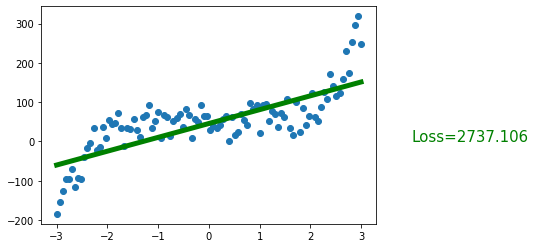

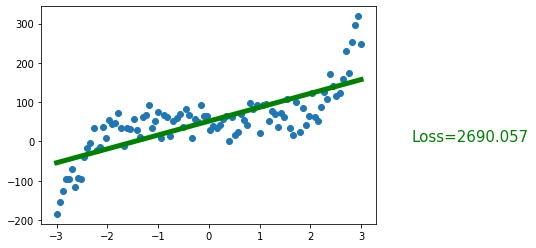

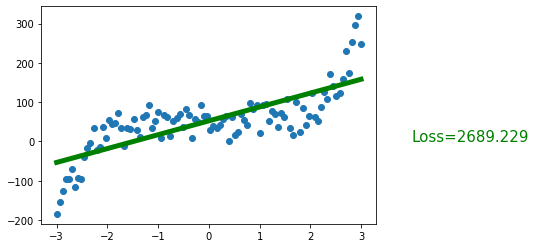

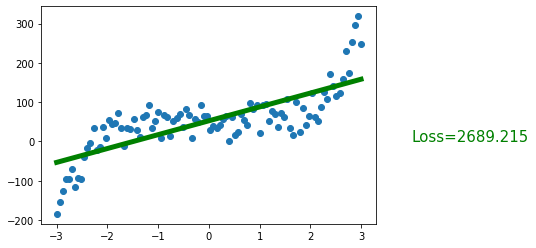

In [6]:
# Turn the interactive mode on
plt.ion()   

for epoch in range(500):
    # forward pass
    y_pred = linear_net.forward(x)     

    # compute the loss
    loss = loss_func(y_pred, y)

    # backward pass
    # compute the gradients for each model parameters
    loss.backward()
    # update all the model parameters
    optimizer.step()

    # set all gradients to zero manually so it won't affect the next step
    optimizer.zero_grad() 

    # every 100 epoches we visualize the regression prediction
    if epoch % 100 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'g-', lw=5)
        plt.text(4, 0, 'Loss=%.3f' % loss.data.numpy(), fontdict={'size': 15, 'color':  'green'})
        plt.pause(0.1)

plt.ioff()
plt.show()

### Train non-linear model

In [19]:
# initialize the network with specific size of input nodes, hidden nodes and output nodes
non_linear_net = NonLinearNet(n_feature=1, n_hidden=50, n_output=1)

# define the loss function we would like to use
loss_func = torch.nn.MSELoss()

# choose the optimizer we want to use
optimizer = torch.optim.SGD(params=non_linear_net.parameters(), lr=0.01)

# print net architecture
print(non_linear_net)  

NonLinearNet(
  (hidden): Linear(in_features=1, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


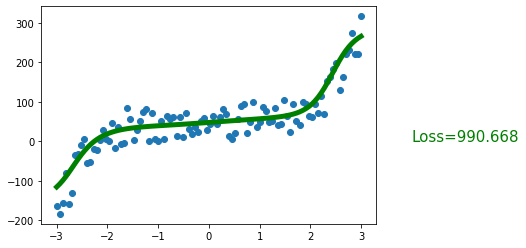

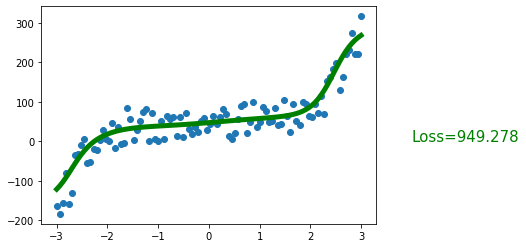

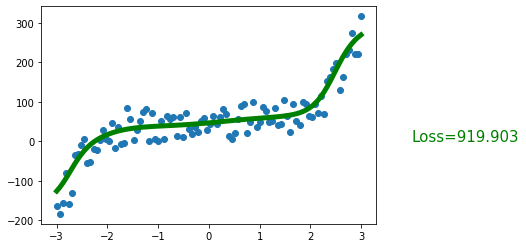

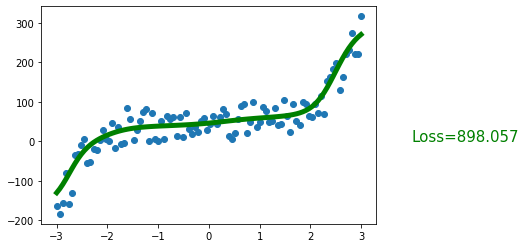

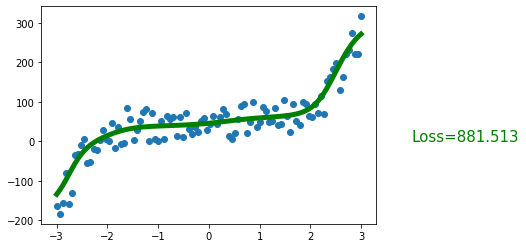

In [21]:
# Turn the interactive mode on
plt.ion()   

for epoch in range(500):
    # forward pass
    y_pred = non_linear_net.forward(x)     

    # compute the loss
    loss = loss_func(y_pred, y)

    # backward pass
    # compute the gradients for each model parameters
    loss.backward()
    # update all the model parameters
    optimizer.step()

    # set all gradients to zero manually so it won't affect the next step
    optimizer.zero_grad() 

    # every 100 epoches we visualize the regression prediction
    if epoch % 100 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'g-', lw=5)
        plt.text(4, 0, 'Loss=%.3f' % loss.data.numpy(), fontdict={'size': 15, 'color':  'green'})
        plt.pause(0.1)

plt.ioff()
plt.show()

#MLP - Multi-class Classification

## Data preprocessing

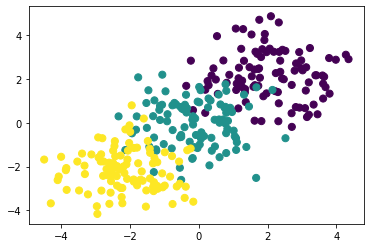

In [17]:
# initialize 100 data points with 2 dimensions
data = torch.ones(100, 2)

# define three different class, each class has 100 points
x0 = torch.normal(2*data, 1)
y0 = torch.zeros(100)

x1 = torch.normal(0*data, 1)     
y1 = torch.ones(100)

x2 = torch.normal(-2*data, 1)     
y2 = torch.ones(100)*2

x = torch.cat((x0, x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1, y2)).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.flatten(), s=50)


## Model architecture

In [18]:
class ClassificationNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(ClassificationNet, self).__init__()
        # hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # output layer  
        self.out = torch.nn.Linear(n_hidden, n_output)

        # softmax function
        # self.softmax = torch.nn.Softmax()
        


    def forward(self, x):
        x = self.hidden(x)
        x = self.out(x)
        # x = self.softmax(x)
        return x


## Model training

In [19]:
# initialize the network with specific size of input nodes, hidden nodes and output nodes
classification_net = ClassificationNet(n_feature=2, n_hidden=2, n_output=3)

# define the loss function we would like to use
loss_func = torch.nn.CrossEntropyLoss()

# choose the optimizer we want to use
optimizer = torch.optim.SGD(params=classification_net.parameters(), lr=0.01)

# print net architecture
print(classification_net)  

ClassificationNet(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (out): Linear(in_features=2, out_features=3, bias=True)
)


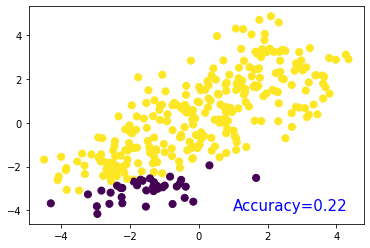

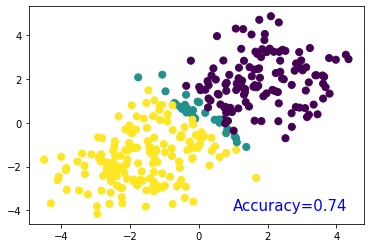

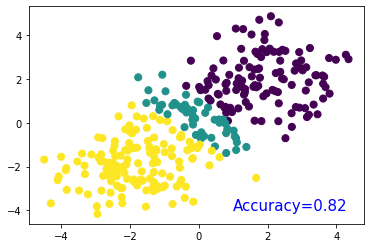

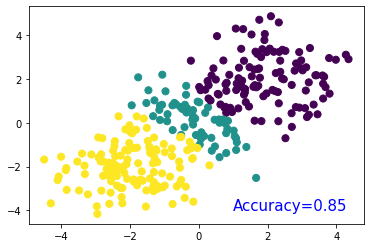

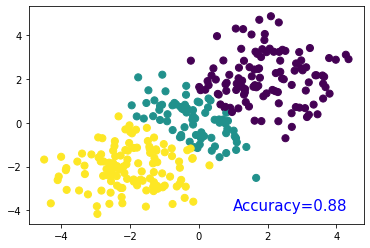

In [20]:
# Turn the interactive mode on
plt.ion()   

for t in range(1000):
    y_pred = classification_net.forward(x) 
    loss = loss_func(y_pred, y)  

    optimizer.zero_grad() 
    loss.backward()    
    optimizer.step()

    if t % 200 == 0:
        plt.cla()
        prediction = torch.max(y_pred, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=50)
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 15, 'color':  'blue'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# MLP - optional problem

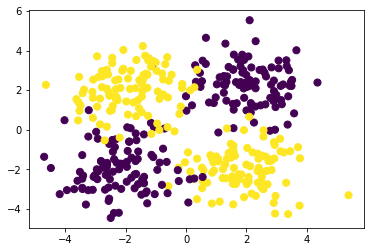

In [8]:
# initialize 100 data points with 2 dimensions
data = torch.ones(100, 2)

# define three different class, each class has 100 points
x0 = torch.normal(2*data, 1)
y0 = torch.zeros(100)

x1 = torch.normal(torch.cat((2*torch.ones(100,1), -2*torch.ones(100,1)), 1), 1)     
y1 = torch.ones(100)

x2 = torch.normal(-2*data, 1)     
y2 = torch.zeros(100)

x3 = torch.normal(torch.cat((-2*torch.ones(100,1), 2*torch.ones(100,1)), 1), 1)     
y3 = torch.ones(100)

x = torch.cat((x0, x1, x2, x3), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1, y2, y3)).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.flatten(), s=50)

OptionalNet(
  (hidden): Linear(in_features=2, out_features=3, bias=True)
  (out): Linear(in_features=3, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


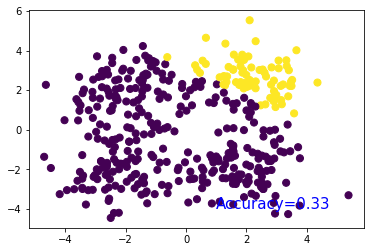

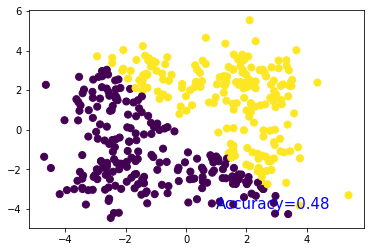

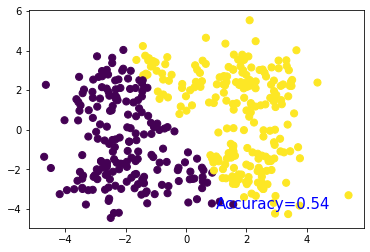

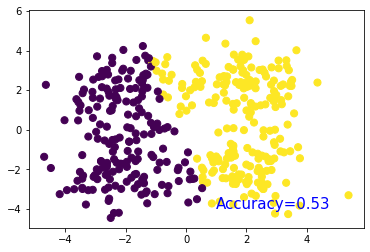

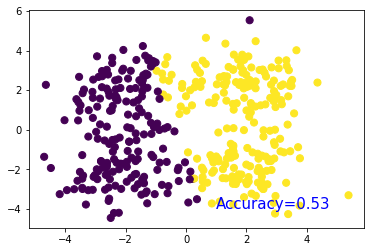

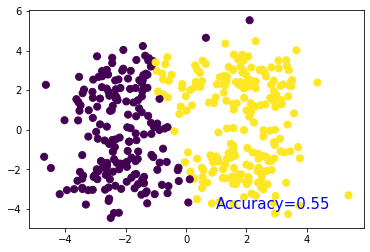

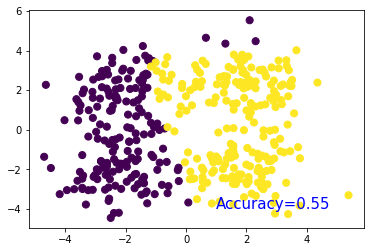

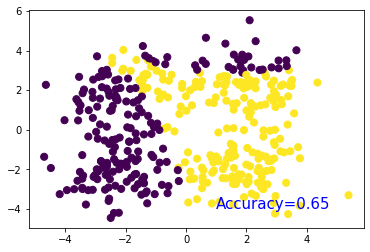

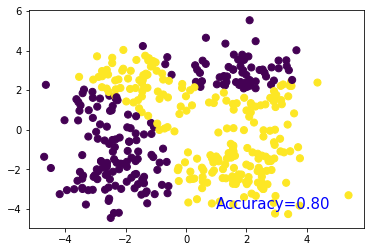

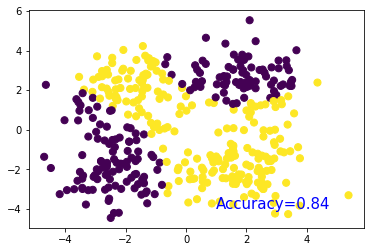

In [9]:
class OptionalNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(OptionalNet, self).__init__()
        # hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)

        # output layer
        self.out = torch.nn.Linear(n_hidden, n_output)

        # sigmoid function
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.out(x)
        return x

# initialize the network with specific size of input nodes, hidden nodes and output nodes
classification_net = OptionalNet(n_feature=2, n_hidden=3, n_output=2)

# define the loss function we would like to use
loss_func = torch.nn.CrossEntropyLoss()

# choose the optimizer we want to use
optimizer = torch.optim.SGD(params=classification_net.parameters(), lr=0.01)

# print net architecture
print(classification_net) 

# Turn the interactive mode on
plt.ion()   

for t in range(10000):
    y_pred = classification_net.forward(x)
    loss = loss_func(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 1000 == 0:
        plt.cla()
        prediction = torch.max(y_pred, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=50)
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 15, 'color':  'blue'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# Interview questions



*   Can we learn any functions using a single layer of neurons?
*   What happens when we use too many nodes in a layer?
*   How to improve the model complexity more efficiently?
*   What is the minimum number of hidden nodes required in this classification problem?
*   What is the minimum number of hidden nodes required in this optinal problem?
